## RQ2.2: Measure the effectiveness of OCR-based text document and visual document when increasing index size.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

def scientific_formatter(x, pos):
    return f"{x:.0e}"  # Two decimal places with scientific notation

def scientific_formatter(x, pos):
    # Normal scientific notation
    s = f"{x:.0e}"
    # Split the string into base and exponent parts
    parts = s.split('e')
    base = parts[0]
    exponent = int(parts[1])  # convert to integer to remove leading '+'

    # Define superscript mapping
    superscripts = str.maketrans("-0123456789", "⁻⁰¹²³⁴⁵⁶⁷⁸⁹")
    
    # Convert exponent to superscript
    exponent_superscript = f"e{exponent}".translate(superscripts)
    
    return f"{base}{exponent_superscript}"

def plot_bar(data, output, use_e=True):
    df = pd.DataFrame(data)
    df['pct_change_screenshot'] = df['ndcg5_screenshot'].pct_change().fillna(0) * 100
    df['pct_change_text'] = df['ndcg5_text'].pct_change().fillna(0) * 100

    labelsize=28
    figsize=26
    # Enlarging font sizes
    plt.rcParams.update({'font.size': 12})  # Adjust font size here
    # Plot
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # First axis
    ax1.set_xlabel('Number of Documents', fontsize=figsize)
    ax1.set_ylabel('NDCG@5', fontsize=figsize)

    ax1.bar(df['size'] - 250, df['ndcg5_screenshot'], width=500, color='tab:blue', label='Image Input')
    ax1.bar(df['size'] + 250, df['ndcg5_text'], width=500, color='tab:red', label='Text Input')

    # Second axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Latency (QPS)', fontsize=figsize)  # Corrected spelling
    ax2.plot(df['size'], df['screenshot_seconds'], color='tab:blue', marker='^', markerfacecolor='yellow', linestyle='--', label='Image Latency')
    ax2.plot(df['size'], df['text_seconds'], color='tab:red', marker='^', markerfacecolor='yellow', linestyle='--', label='Text latency')

    # Define specific x-axis tick positions and labels
    xtick_positions = df['size']
    xtick_labels = [str(x) for x in xtick_positions]  # Convert positions to string if needed
    # Set x-axis ticks and labels
    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels)

    # Set specific y-ticks for ax1
    yticks_ax1 = np.arange(0, 1.1, 0.2)
    ax1.set_yticks(yticks_ax1)
    if use_e: ax2.yaxis.set_major_formatter(FuncFormatter(scientific_formatter))


    for spine in ax1.spines.values():
        spine.set_linewidth(0.3)  # Set the spine linewidth to 0.5
    for spine in ax2.spines.values():
        spine.set_linewidth(0.3)  # Set the spine linewidth to 0.5



    ax1.tick_params(axis='x', labelsize=labelsize)
    ax1.tick_params(axis='y', labelsize=labelsize)
    ax2.tick_params(axis='y', labelsize=labelsize)

    ax2.set_ylim(0, 2e-2)

    # Handling legends from both axes
    # handles1, labels1 = ax1.get_legend_handles_labels()
    # handles2, labels2 = ax2.get_legend_handles_labels()
    # ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=28, ncol=2,
    #            handlelength=2, borderpad=0.5, labelspacing=0.5, borderaxespad=0.5)

    plt.tight_layout()
    plt.savefig(output, bbox_inches='tight')
    # plt.show()

colqwen2_arkivqa_data = {
    "size": [500, 2500, 5000, 7500, 10000],
    "ndcg5_screenshot": [0.860, 0.778, 0.744, 0.722, 0.710],
    "screenshot_seconds": [1.568, 7.803, 15.607, 22.933, 30.543],
    "ndcg5_text": [0.382, 0.320, 0.294, 0.281, 0.275],
    "text_seconds": [0.711, 3.661, 7.492, 11.459, 15.703]
}
# plot_bar(colqwen2_arkivqa_data, f"/ivi/ilps/personal/jqiao/colpali/plots/colqwen2_arkivqa_data.jpg")

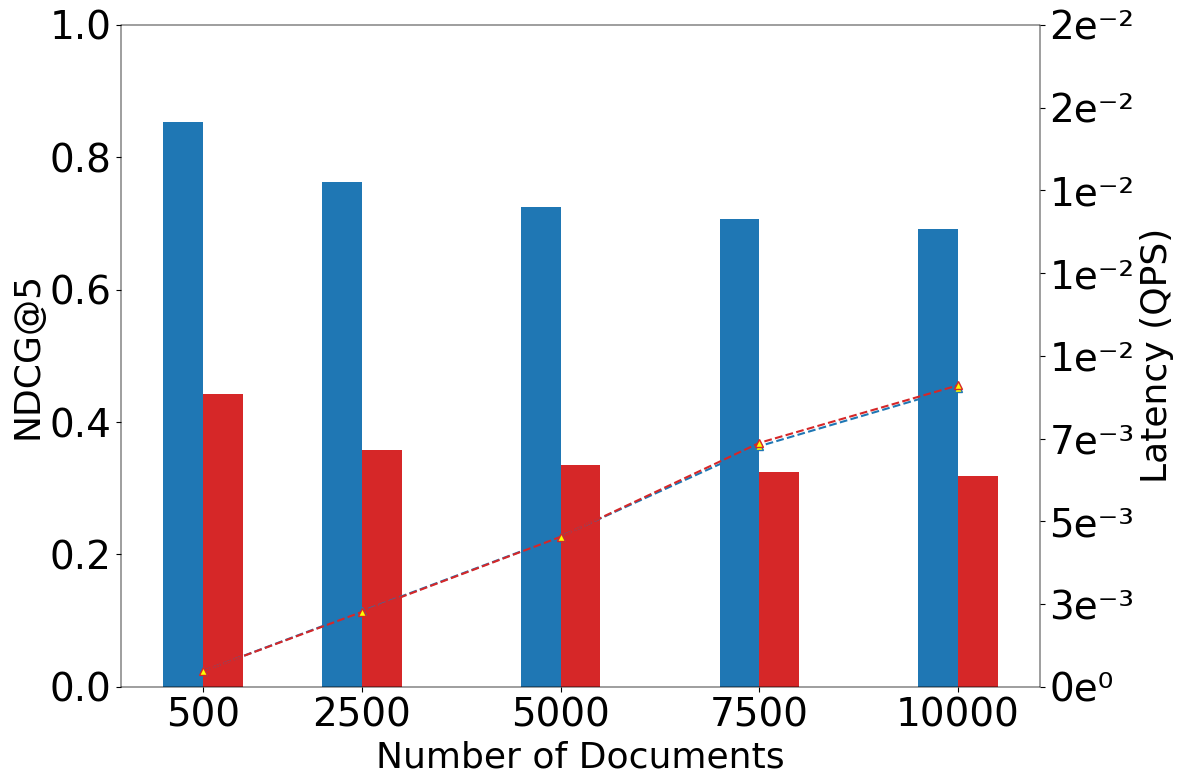

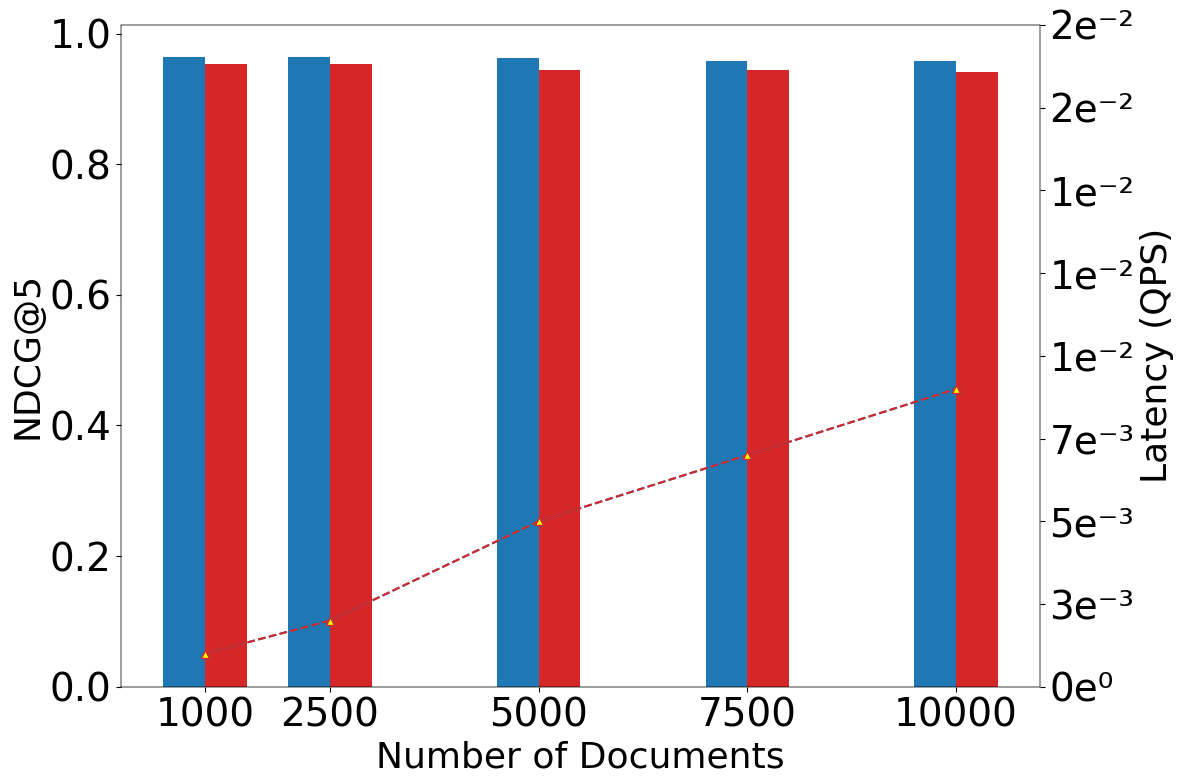

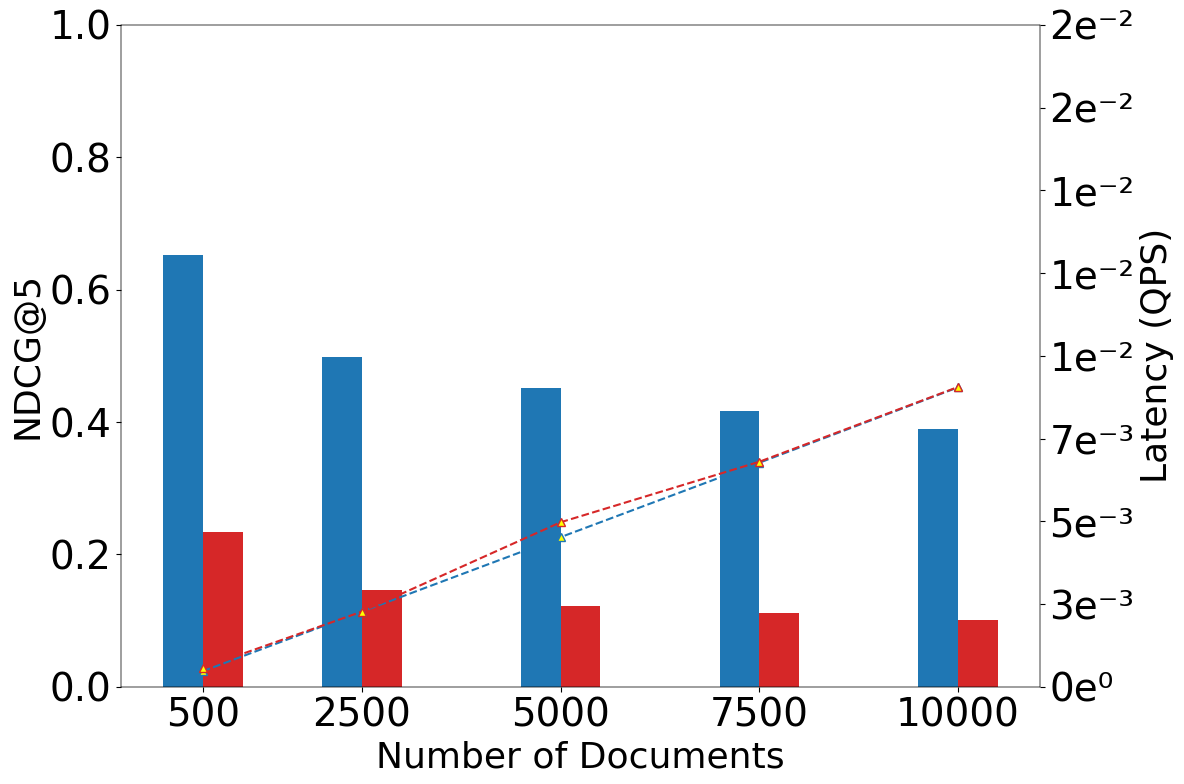

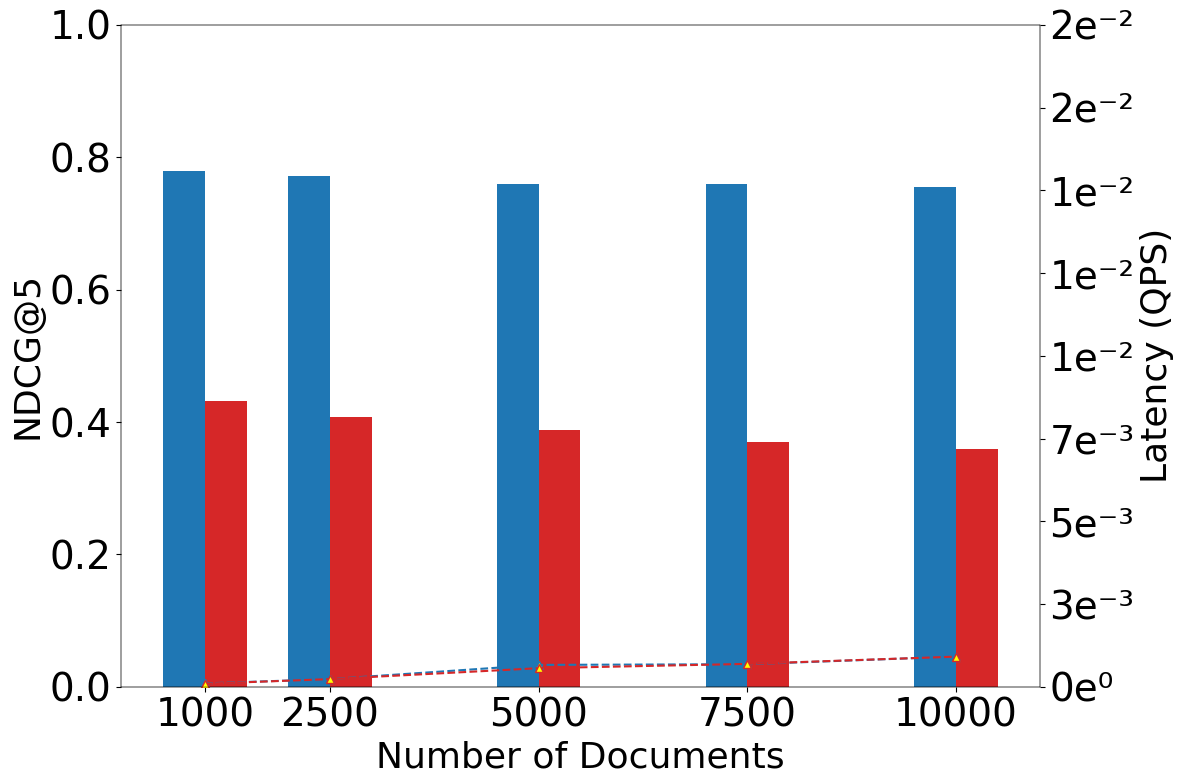

In [46]:
colqwen2_arkivqa_data = {
    "size": [500, 2500, 5000, 7500, 10000],
    "ndcg5_screenshot": [0.860, 0.778, 0.744, 0.722, 0.710],
    "screenshot_seconds": [1.568, 7.803, 15.607, 22.933, 30.543],
    "ndcg5_text": [0.382, 0.320, 0.294, 0.281, 0.275],
    "text_seconds": [0.711, 3.661, 7.492, 11.459, 15.703]
}

colqwen2_pdfvqa_data = {
    "size": [1000, 2500, 5000, 7500, 10000],
    "ndcg5_screenshot": [0.980, 0.973, 0.973, 0.963, 0.963],
    "screenshot_seconds": [2.333, 4.880, 9.159, 13.559, 17.906],
    "ndcg5_text": [0.951, 0.941, 0.930, 0.927, 0.927],
    "text_seconds": [3.824, 13.412, 29.567, 46.823, 64.467]
}

dse_arkivqa_data = {
    "size": [500, 2500, 5000, 7500, 10000],
    "ndcg5_screenshot": [0.854, 0.762, 0.725, 0.707, 0.692],
    "screenshot_seconds": [0.00047, 0.00228, 0.00454, 0.00727, 0.00904],
    "ndcg5_text": [0.443, 0.357, 0.335, 0.325, 0.319],
    "text_seconds": [0.00047, 0.00226, 0.00453, 0.00737, 0.00911]
    
}

dse_pdfvqa_data = {
    "size": [1000, 2500, 5000, 7500, 10000],
    "ndcg5_screenshot": [0.965, 0.965, 0.962, 0.958, 0.958],
    "screenshot_seconds": [0.001, 0.002, 0.005, 0.007, 0.009],
    "ndcg5_text": [0.954, 0.954, 0.944, 0.944, 0.941],
    "text_seconds": [0.001, 0.002, 0.005, 0.007, 0.009] 
}

biqwen2_arkivqa_data = {
    "size": [500, 2500, 5000, 7500, 10000],
    "ndcg5_screenshot": [0.653, 0.499, 0.452, 0.417, 0.390],
    "screenshot_seconds": [0.00047, 0.00227, 0.00452, 0.00677, 0.00905],
    "ndcg5_text": [0.234, 0.146, 0.122, 0.111, 0.101],
    "text_seconds": [0.00057, 0.00227, 0.00497, 0.00680, 0.00906]
}


biqwen2_pdfvqa_data = {
    "size": [1000, 2500, 5000, 7500, 10000],
    "ndcg5_screenshot": [0.780, 0.772, 0.760, 0.760, 0.755],
    "screenshot_seconds": [0.00010, 0.00023, 0.00066, 0.00068, 0.00091],
    "ndcg5_text": [0.432, 0.408, 0.388, 0.370, 0.359],
    "text_seconds": [0.00009, 0.00023, 0.00056, 0.00069, 0.00091]
}

# plot_bar(colqwen2_arkivqa_data, f"/ivi/ilps/personal/jqiao/colpali/plots/colqwen2_arkivqa_data.pdf")
# plot_bar(colqwen2_pdfvqa_data, f"/ivi/ilps/personal/jqiao/colpali/plots/colqwen2_pdfvqa_data.pdf")
plot_bar(dse_arkivqa_data, f"/ivi/ilps/personal/jqiao/colpali/plots/dse_arkivqa_data.pdf")
plot_bar(dse_pdfvqa_data, f"/ivi/ilps/personal/jqiao/colpali/plots/dse_pdfvqa_data.pdf")
plot_bar(biqwen2_arkivqa_data, f"/ivi/ilps/personal/jqiao/colpali/plots/biqwen2_arkivqa_data.pdf")
plot_bar(biqwen2_pdfvqa_data, f"/ivi/ilps/personal/jqiao/colpali/plots/biqwen2_pdfvqa_data.pdf")


## Summary of VIDORE benchmark

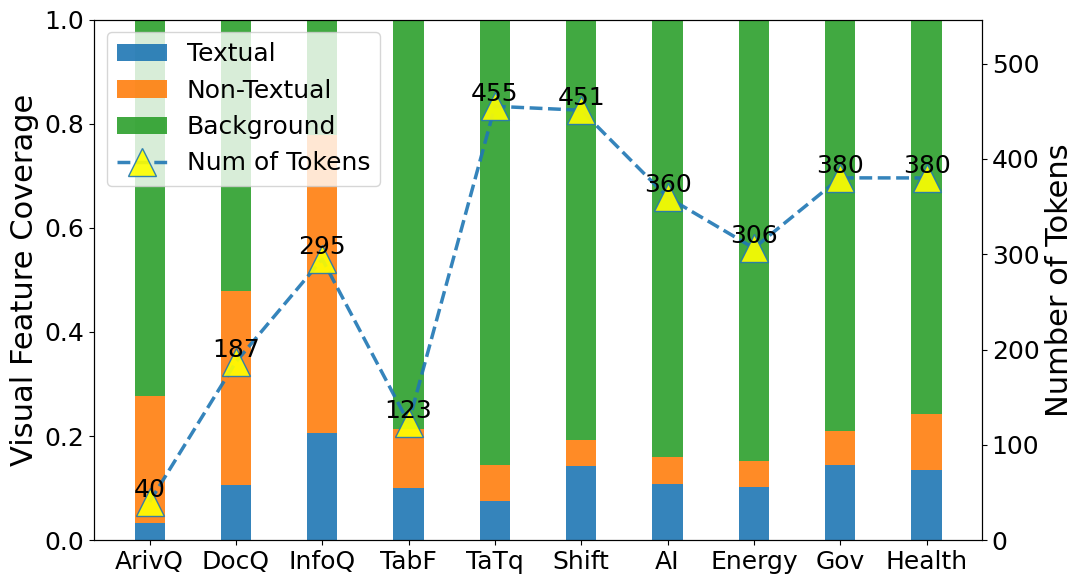

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
data = {
    'Fields': ['ArivQ', 'DocQ', 'InfoQ', 'TabF', 'TaTq', 'Shift', 'AI', 'Energy', 'Gov', 'Health'],
    'textual coverage': [0.032912233, 0.105982028, 0.205622082, 0.100509661, 0.075508884, 0.141668517, 0.107684492, 0.102743487, 0.144577157, 0.134205212],
    'non-textual coverage': [0.244866264, 0.372453502, 0.571953929, 0.113965254, 0.068425522, 0.051443936, 0.052483557, 0.049524481, 0.066055507, 0.1076275],
    'Background coverages': [0.722221503, 0.52156447, 0.222423989, 0.785525085, 0.856065594, 0.806887547, 0.839831951, 0.847732031, 0.789367336, 0.758167288],
    'num tokens': [40.272, 187.0554324, 294.8481781, 123.2, 455.1585662, 451.039604, 359.8217822, 306.4158416, 380.1089109, 380.009901]
}

df = pd.DataFrame(data).set_index('Fields')

# Plotting setup
fig, ax1 = plt.subplots(figsize=(11, 6))

# X locations for the groups
indices = np.arange(len(df))

# Width of the bars
width = 0.35

# Plot bars
ax1.bar(indices, df['textual coverage'], width, label='Textual', color='tab:blue', alpha=0.9)
ax1.bar(indices, df['non-textual coverage'], width, bottom=df['textual coverage'], label='Non-Textual', color='tab:orange', alpha=0.9)
ax1.bar(indices, df['Background coverages'], width, bottom=df['textual coverage'] + df['non-textual coverage'], label='Background', color='tab:green', alpha=0.9)

# Setting the y-axis label for coverage and adjusting its limits
ax1.set_ylabel('Visual Feature Coverage', fontsize=22)
ax1.set_ylim(0, 1)

# Creating a secondary y-axis for coverage proportions
ax2 = ax1.twinx()
line = ax2.plot(indices, df['num tokens'], label='Num of Tokens', color='tab:blue', alpha=0.9, linewidth=2.5, marker='^', markerfacecolor='yellow', markersize=20, linestyle='--')

# Add values on top of each point in the line
for i, txt in enumerate(df['num tokens']):
    ax2.text(indices[i], txt, f'{txt:.0f}', color='black', ha='center', fontsize=18, verticalalignment='bottom')

ax2.set_ylabel('Number of Tokens', fontsize=22)
ax2.set_xticks(indices)
ax2.set_xticklabels(df.index, rotation=45, fontsize=18)
ax2.set_ylim(0, max(df['num tokens']) * 1.2)

ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

# Combining legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles1 + handles2, labels1 + labels2, fontsize=18)

plt.tight_layout()
plt.savefig("/ivi/ilps/personal/jqiao/colpali/plots/benchmark.pdf")
plt.show()
